In [1]:
#Loading and analysing Fashion MNIST dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
#Explore the dataset

In [3]:
type(train_images)

numpy.ndarray

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
#Review the number of instances for each class
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
#Image overview

In [9]:
#25 random images
import random
random.seed(1)
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 25)
sampler

[8805,
 37303,
 55537,
 52577,
 50054,
 4135,
 16716,
 7727,
 32468,
 49870,
 29457,
 30949,
 42702,
 24878,
 51689,
 13759,
 6151,
 31972,
 1857,
 58544,
 54772,
 25546,
 28361,
 39809,
 49956]

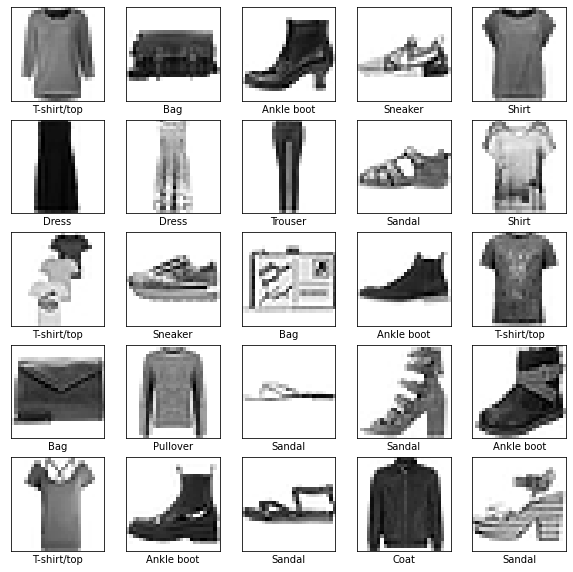

In [10]:
plt.figure(figsize=(10, 10))
for i in range(len(sampler)):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[sampler[i]]])
plt.show()

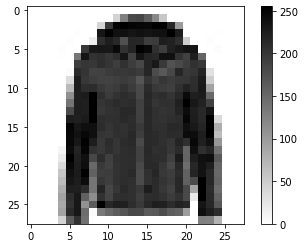

In [11]:
#Review a single image
random_image_id = 5000
plt.figure()
plt.imshow(train_images[random_image_id],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
class_names[train_labels[random_image_id]]

'Coat'

In [13]:
train_images[random_image_id]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

In [14]:
#Build, compile and train the model
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

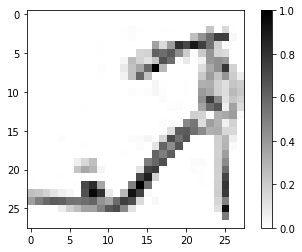

In [15]:
plt.figure()
plt.imshow(train_images[8], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                           
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(64, activation='relu'),                              
  tf.keras.layers.Dense(10),                             
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 5s 4ms/step - loss: 0.6977 - accuracy: 0.7627 - val_loss: 0.4058 - val_accuracy: 0.8548
Epoch 2/10
844/844 [==============================] - 1s 1ms/step - loss: 0.3903 - accuracy: 0.8583 - val_loss: 0.3786 - val_accuracy: 0.8617
Epoch 3/10
844/844 [==============================] - 1s 1ms/step - loss: 0.3487 - accuracy: 0.8718 - val_loss: 0.3463 - val_accuracy: 0.8722
Epoch 4/10
844/844 [==============================] - 1s 1ms/step - loss: 0.3154 - accuracy: 0.8831 - val_loss: 0.3502 - val_accuracy: 0.8750
Epoch 5/10
844/844 [==============================] - 1s 1ms/step - loss: 0.3000 - accuracy: 0.8877 - val_loss: 0.3388 - val_accuracy: 0.8793
Epoch 6/10
844/844 [==============================] - 1s 1ms/step - loss: 0.2842 - accuracy: 0.8931 - val_loss: 0.3175 - val_accuracy: 0.8873
Epoch 7/10
844/844 [==============================] - 1s 1ms/step - loss: 0.2633 - accuracy: 0.9014 - val_loss: 0.3389 - val_accuracy: 0.8807
Epoch 

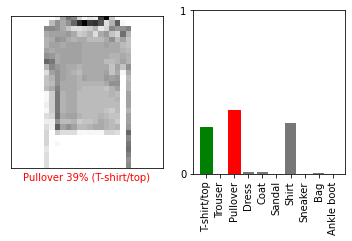

In [17]:
#Make predictions
image_id = 2953 # Pick an image id between 0 and 9999 inclusive

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_id, predictions[image_id], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_id, predictions[image_id],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

In [18]:
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz

In [20]:
#Fashion dataset (MNIST)
#tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
